Data Set is imported from https://www.kaggle.com/c/titanic
This Project aims to use logistic regression for a biclassification problem on the famous titanic set. Two excel files are used, one for training and one for testing the model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing the basic libraries required for exploratory data analysis

In [2]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
train.drop('PassengerId',axis=1,inplace=True)#dropping passengerid as we dont need it for our model 

In [9]:
#exploratory data analysis to observe trends in data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Survived', ylabel='Age'>

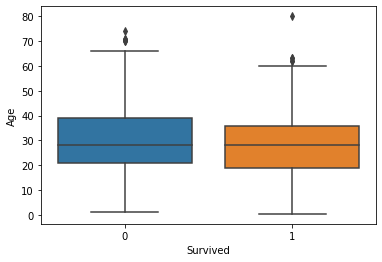

In [12]:
sns.boxplot(x='Survived',y='Age',data=train)#mean is almost the same for both survived and non survived people

In [39]:
from matplotlib.pyplot import figure #to resize figures


<AxesSubplot:xlabel='Survived', ylabel='count'>

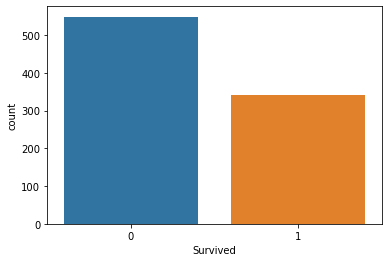

In [13]:
sns.countplot(x='Survived',data=train)#less people survived 

<AxesSubplot:xlabel='Survived', ylabel='count'>

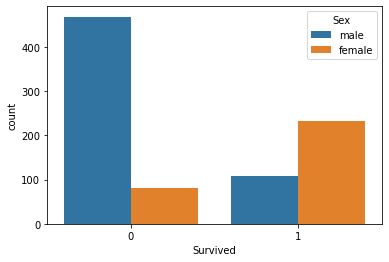

In [14]:
sns.countplot(x='Survived',hue='Sex',data=train)#more females survived

In [34]:
train['Number']=train.index

<AxesSubplot:xlabel='Number', ylabel='Fare'>

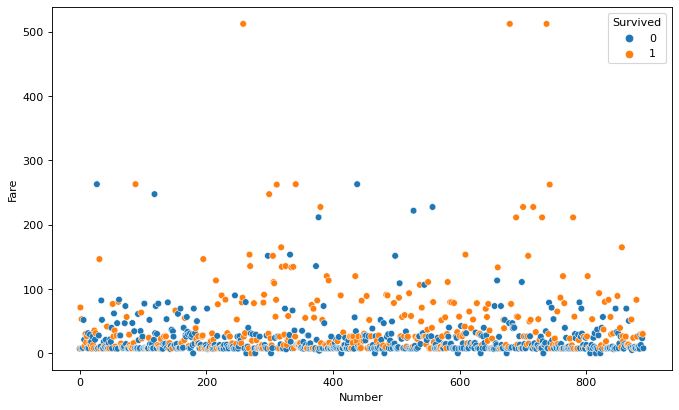

In [45]:
figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x='Number',y='Fare',hue='Survived',data=train)#survivors generally had higher fares than non survivors

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

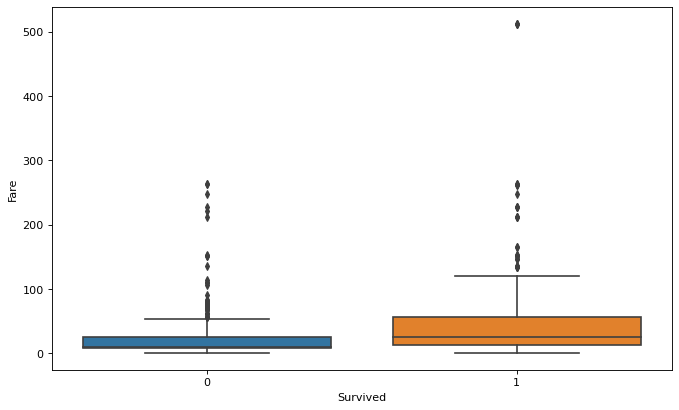

In [47]:
figure(figsize=(10, 6), dpi=80)

sns.boxplot(x='Survived',y='Fare',data=train)#the survived on average payed higher fares

<AxesSubplot:xlabel='Pclass', ylabel='count'>

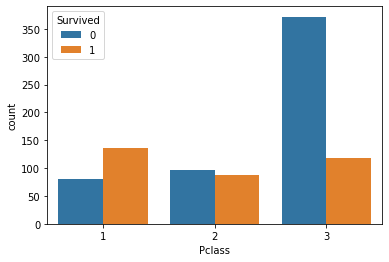

In [51]:
sns.countplot(x='Pclass',hue='Survived',data=train)#class 1 had the most survivors

In [62]:
train['Fare'][train['Pclass']==3]

0       7.2500
2       7.9250
4       8.0500
5       8.4583
7      21.0750
        ...   
882    10.5167
884     7.0500
885    29.1250
888    23.4500
890     7.7500
Name: Fare, Length: 491, dtype: float64

<AxesSubplot:xlabel='Number', ylabel='Fare'>

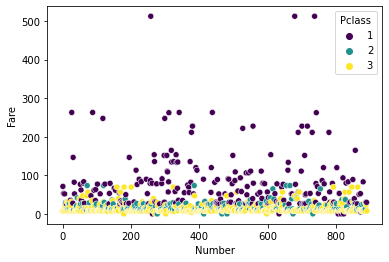

In [64]:
sns.scatterplot(x='Number',y='Fare',hue='Pclass',data=train,palette='viridis')#fares are consistent with classes

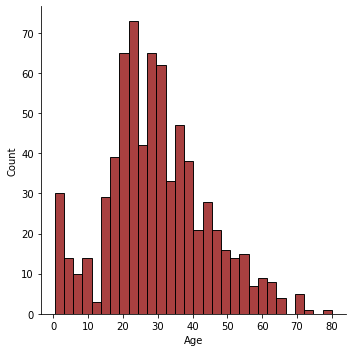

In [66]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

# Now We will check for missing data if any

<AxesSubplot:>

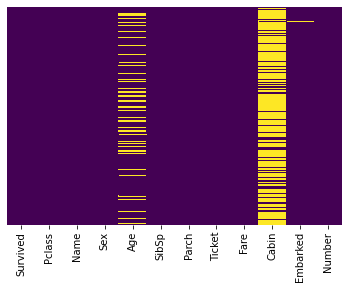

In [70]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cabin data is just too missing to be used for a model.
#we will drop it. As for the age columns, we can use the average age of the classes and then fill the missing data.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

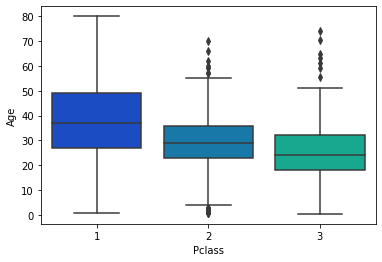

In [71]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [96]:
def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [97]:
train['Age']=train[['Age','Pclass']].apply(age,axis=1)

In [101]:
train.drop('Cabin',axis=1,inplace=True)

In [102]:
train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Number
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4


<AxesSubplot:>

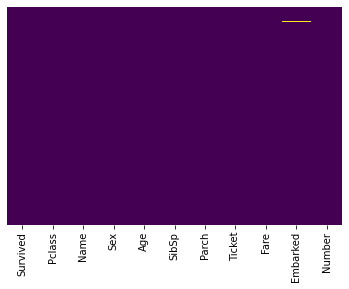

In [103]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')# columns are filled


# Feature engineering


In [108]:
sex = pd.get_dummies(train['Sex'],drop_first=True)


In [110]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [137]:
title=train[train['Name'].str.contains('Dr|Master')]
title.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Number
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S,7
16,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Q,16
47,1,3,"O'Driscoll, Miss. Bridget",female,25.0,0,0,14311,7.750,Q,47


<AxesSubplot:xlabel='Survived', ylabel='count'>

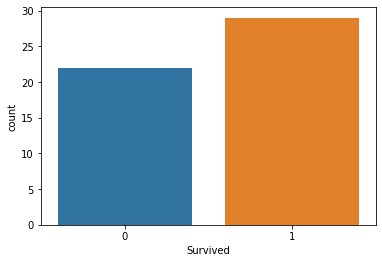

In [134]:
sns.countplot(x='Survived',data=title)# the difference is too less between people with titles to consider it as a factor

In [141]:
title2=train[train['Name'].str.contains('Miss|Mrs')]
title2


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Number
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,9
...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,880
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,882
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,885
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,887


In [151]:
def married(col):
    if 'Mrs' in col :
        return 'Married'
    else: 
        return 'Not Married'
    
    

In [157]:
title2['Married']=title2['Name'].apply(married)

<ipython-input-157-86e36c185780>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title2['Married']=title2['Name'].apply(married)


<AxesSubplot:xlabel='Survived', ylabel='count'>

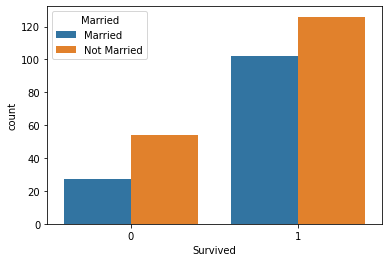

In [170]:
sns.countplot(x='Survived',hue='Married',data=title2) #Non married woman 
#formed a bigger part of both survived and non survived.However this feature 
#cant be used since we have no information on the males in the entire data


In [177]:
embark = pd.get_dummies(train['Embarked'],drop_first=True) #c q and S are three ports from where the passenger embarked

In [178]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [180]:
train.drop(['Name','Sex','Ticket','Embarked','Number'],axis=1,inplace=True)

In [208]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [209]:
train=pd.concat([train,sex,embark],axis=1)

In [210]:
train.head()#now the data is fully feature engineered

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [211]:
test = pd.read_csv('titanic_test.csv')

In [213]:
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [214]:
sex = pd.get_dummies(test['Sex'],drop_first=True)


In [215]:
test=pd.concat([test,sex,embark],axis=1)

In [217]:
test['Age']=test[['Age','Pclass']].apply(age,axis=1)

<AxesSubplot:>

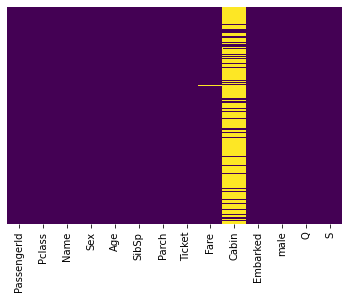

In [221]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [226]:
test.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [232]:
test['Fare'].mean()

35.6271884892086

In [267]:
test['Fare'] = test['Fare'].replace(np.nan, 35.63)


<AxesSubplot:>

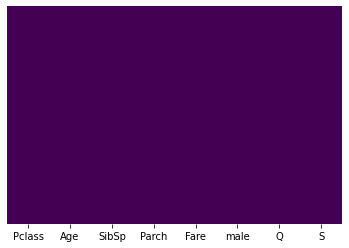

In [240]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')# columns are filled
        
        

# Training Model and Predicting

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [244]:
from sklearn.linear_model import LogisticRegression

In [246]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [247]:
predictions = logmodel.predict(X_test)

In [248]:
from sklearn.metrics import classification_report

In [249]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [269]:
realpredictions=logmodel.predict(test)

In [290]:
Predictedvalues=pd.DataFrame(realpredictions,columns=['Survived'])

In [277]:
Predictedvalues.to_csv (r'C:\Users\zaigh\Desktop\export_dataframe.csv', index = False, header=True)


In [291]:
result=pd.concat([test,Predictedvalues],axis=1)

In [292]:
result #this dataframe shows the application of our logistic model on test data.

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1
...,...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1,0
414,1,39.0,0,0,108.9000,0,0,0,1
415,3,38.5,0,0,7.2500,1,0,1,0
416,3,25.0,0,0,8.0500,1,0,1,0
